# Classification of Covid-19 Patients

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import keras_tuner as kt

## Data Preprocessing
### Loading the dataset
Now, let's load the dataset and display the first few rows of the dataset.

In [2]:
# Load the dataset
data_path = 'data/Covid Data.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### Data Exploration

In [3]:
# Display the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
# Check column null data
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

As we can see, there is no null data in the original dataset, as missing data have been replaced with 97, 98, 99, or 9999-99-99.

In [5]:
# Check for missing data
# According to the dataset description, 1 means "yes" and 2 means "no".
df['TOBACCO'].value_counts()

TOBACCO
2     960979
1      84376
98      3220
Name: count, dtype: int64

In [6]:
df['ICU'].value_counts()

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

In [7]:
df['INTUBED'].value_counts()

INTUBED
97    848544
2     159050
1      33656
99      7325
Name: count, dtype: int64

In [8]:
df['PREGNANT'].value_counts()

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

In [9]:
df['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

As we can see, there are a few missing values which are valued 97, 98 or 99. We will alter or remove these values and see the final number of rows of the dataset remaining.

In [10]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION',
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    df = df[(df[col] == 1)|(df[col] == 2)]
    
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [11]:
# Change the date values so that if someone dies its 1, and if not its 2.

df['DATE_DIED'] = [2 if row =='9999-99-99' else 1 for row in df['DATE_DIED']]
df['DATE_DIED'].value_counts()

DATE_DIED
2    950438
1     74714
Name: count, dtype: int64

In [12]:
# remove these 2 columns as they have a too high percentage of missing data.

df.drop(columns=['INTUBED','ICU'],inplace=True)
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')

In [13]:
print('MALE',df.query('SEX==2')['PREGNANT'].value_counts(), sep='\n')
print('\nFEMALE',df.query('SEX==1')['PREGNANT'].value_counts(), sep='\n')

MALE
PREGNANT
97    511936
Name: count, dtype: int64

FEMALE
PREGNANT
2     502200
1       7841
98      3175
Name: count, dtype: int64


In [14]:
# As we can see males cannot get pregnant and a minority females with missing data,
# We will change the missing data to 2 (no)

df['PREGNANT'] = df['PREGNANT'].replace(97,2)
df['PREGNANT'] = df['PREGNANT'].replace(98,2)
df['PREGNANT'].value_counts()

PREGNANT
2    1017311
1       7841
Name: count, dtype: int64

In [15]:
# See the number of unique values in each column, specifically to ensure Boolean columns only have 2 unique values.

for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7


In [16]:
# Now, we will make the data more readable by changing the values of the columns to more understandable values, i.e. 2 to 0, 1 to 1.

# List of columns with 2 unique values
columns_to_replace = [
    'USMER', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'PNEUMONIA', 'PREGNANT', 
    'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO'
]

# Replace 2 with 0 in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace(2, 0)

In [17]:
# The final shape of the dataset
df.shape

(1025152, 19)

In [18]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,0,1,1,1,1,1,65,0,0,0,0,0,1,0,0,0,0,0,3
1,0,1,0,1,1,1,72,0,0,0,0,0,1,0,0,1,1,0,5
2,0,1,0,0,1,0,55,0,1,0,0,0,0,0,0,0,0,0,3
3,0,1,1,1,1,0,53,0,0,0,0,0,0,0,0,0,0,0,7
4,0,1,0,1,1,0,68,0,1,0,0,0,1,0,0,0,0,0,3
5,0,1,1,0,0,1,40,0,0,0,0,0,0,0,0,0,0,0,3
6,0,1,1,1,0,0,64,0,0,0,0,0,0,0,0,0,0,0,3
7,0,1,1,1,0,1,64,0,1,0,0,1,1,0,0,0,1,0,3
8,0,1,1,0,0,0,37,0,1,0,0,0,1,0,0,1,0,0,3
9,0,1,1,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,3


## Data Visualization
### Correlation Matrix

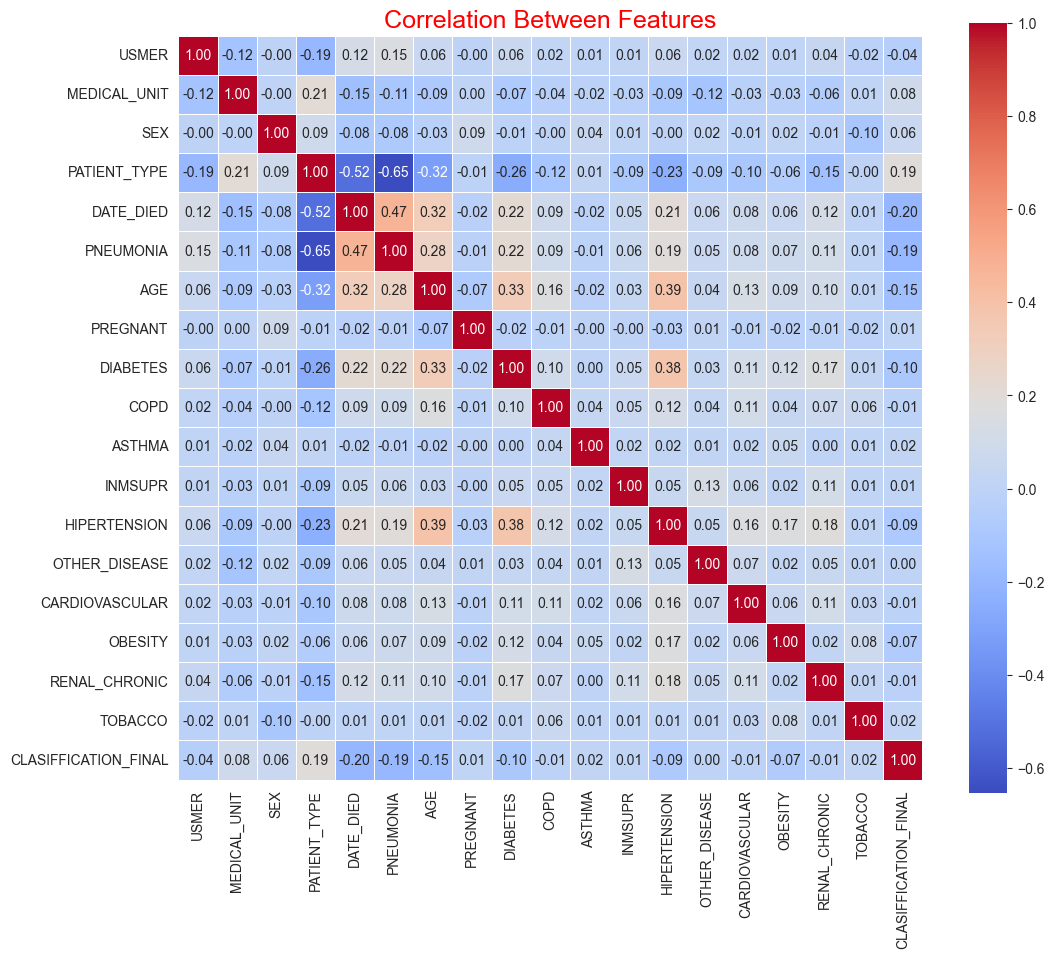

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Between Features', fontsize=18, color='red')
plt.show()

### Age Distribution

<Axes: title={'center': 'Age Distribution'}, xlabel='AGE', ylabel='Count'>

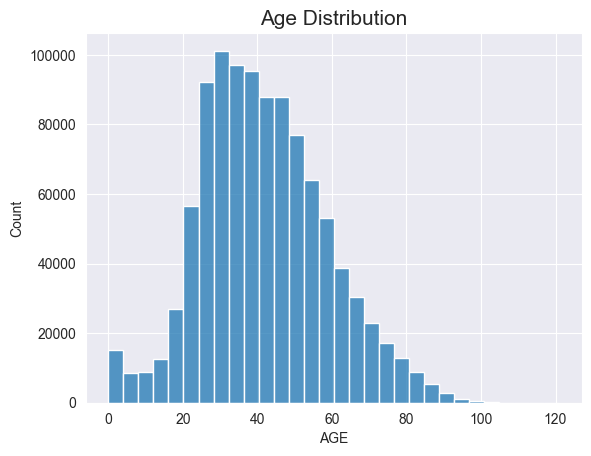

In [20]:
plt.title('Age Distribution', fontsize=15)
sns.histplot(data=df, x=df['AGE'],bins=30)

### Box plots

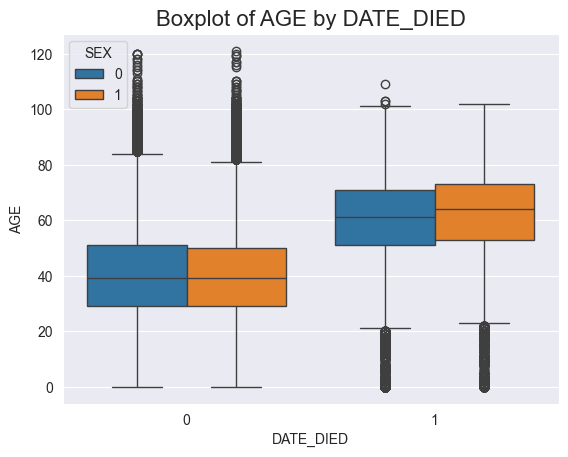

In [21]:
sns.boxplot(x="DATE_DIED", y="AGE",hue="SEX",data=df)
plt.title('Boxplot of AGE by DATE_DIED', fontsize=16)
plt.show()

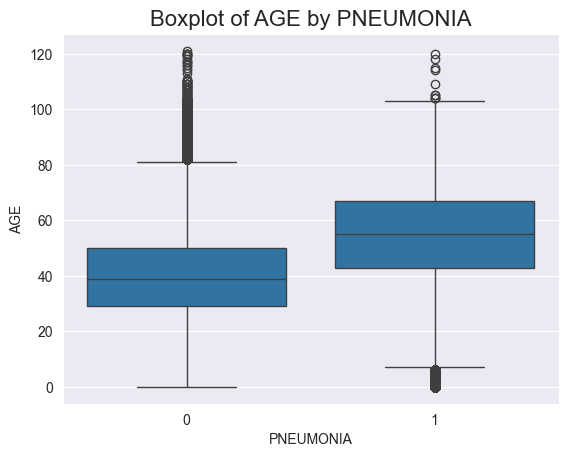

In [22]:
sns.boxplot(x='PNEUMONIA', y='AGE', data=df)
plt.title('Boxplot of AGE by PNEUMONIA', fontsize=16)
plt.show()

### Various other plots

In [23]:
# We will explore each variable's correlation with death.

correlation_with_death = df.corr()['DATE_DIED'].sort_values(ascending=False)
print(correlation_with_death)

DATE_DIED               1.000000
PNEUMONIA               0.470800
AGE                     0.322412
DIABETES                0.217115
HIPERTENSION            0.205158
RENAL_CHRONIC           0.119396
USMER                   0.118973
COPD                    0.089846
CARDIOVASCULAR          0.076582
OTHER_DISEASE           0.057247
OBESITY                 0.056427
INMSUPR                 0.049308
TOBACCO                 0.005245
ASTHMA                 -0.017221
PREGNANT               -0.020997
SEX                    -0.080882
MEDICAL_UNIT           -0.154588
CLASIFFICATION_FINAL   -0.197313
PATIENT_TYPE           -0.520023
Name: DATE_DIED, dtype: float64


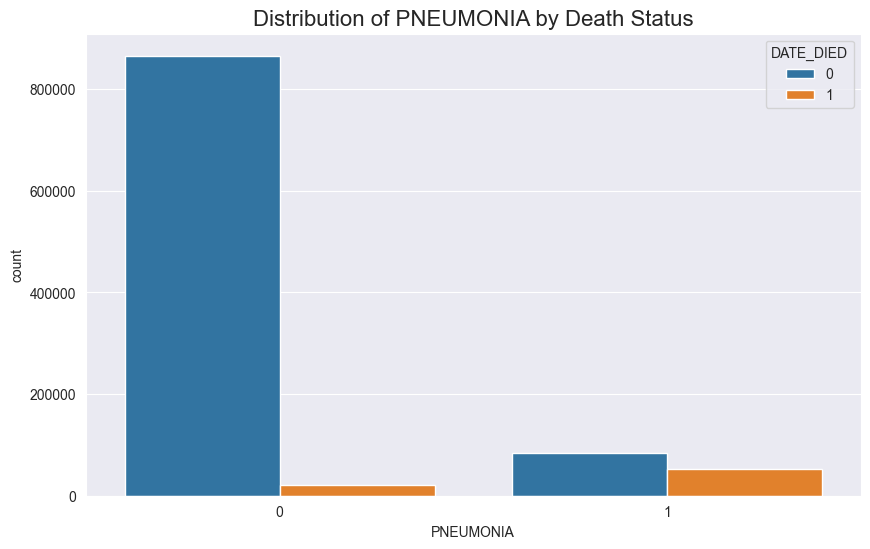

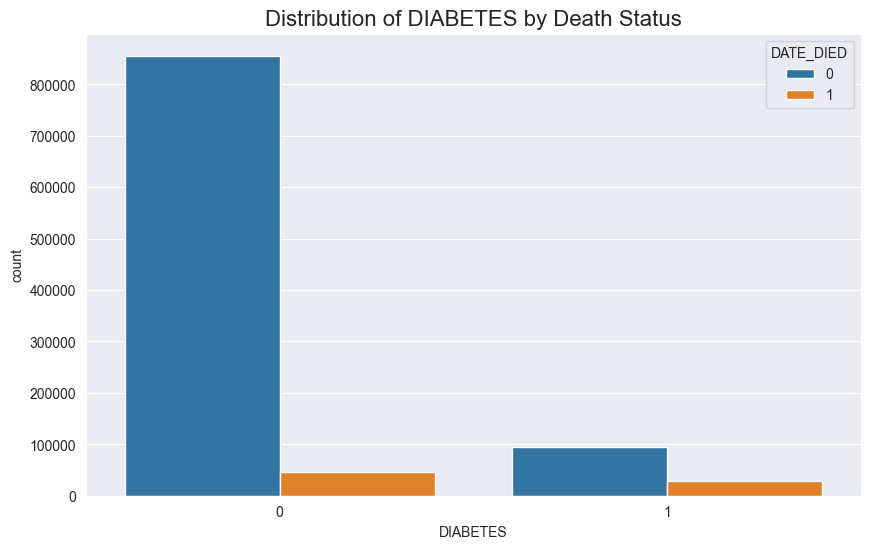

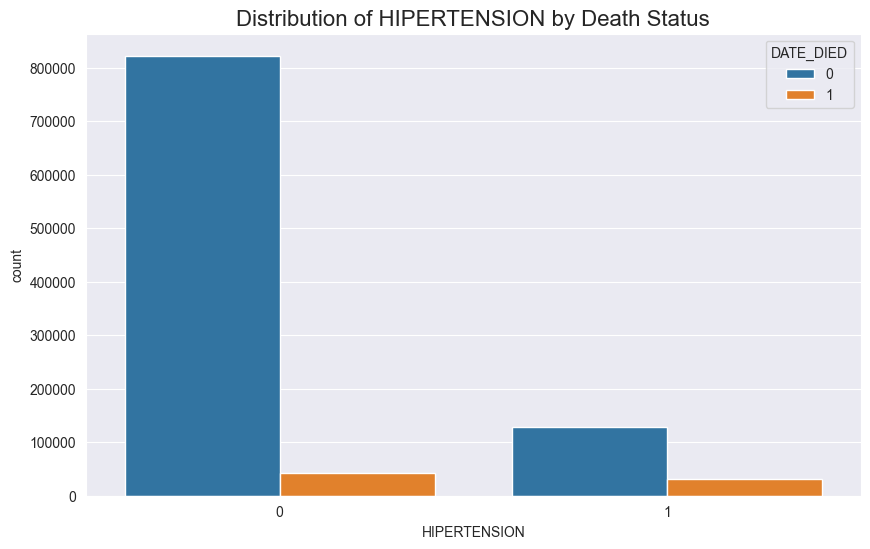

In [24]:
# We will explore graphs of pneumonia, diabetes and hypertension as they have the highest correlation value.

# Plot the distribution of PNEUMONIA
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PNEUMONIA', hue='DATE_DIED')
plt.title('Distribution of PNEUMONIA by Death Status', fontsize=16)
plt.show()

# Plot the distribution of DIABETES
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DIABETES', hue='DATE_DIED')
plt.title('Distribution of DIABETES by Death Status', fontsize=16)
plt.show()

# Plot the distribution of HIPERTENSION
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HIPERTENSION', hue='DATE_DIED')
plt.title('Distribution of HIPERTENSION by Death Status', fontsize=16)
plt.show()

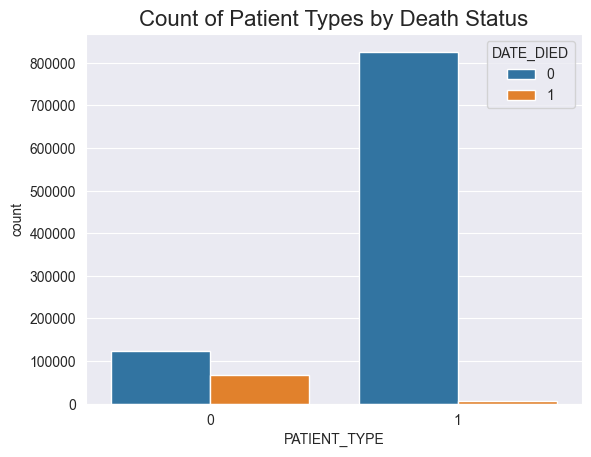

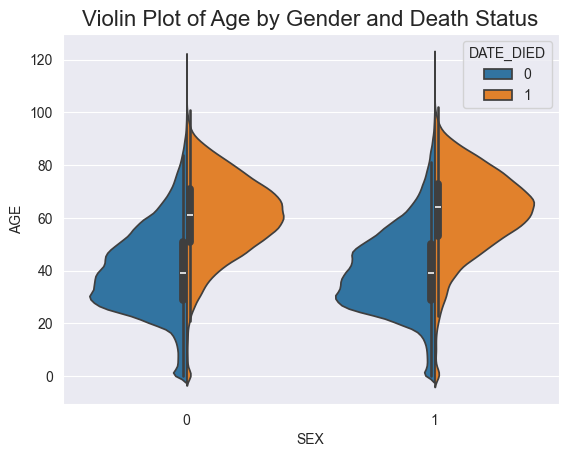

In [25]:
# We will see the patient type (1=return home, 2=hospitalised) by death status (1=died, 2=not died)
sns.countplot(data=df, x='PATIENT_TYPE', hue='DATE_DIED')
plt.title('Count of Patient Types by Death Status', fontsize=16)
plt.show()

# We will do a violin plot of age by gender and death status
sns.violinplot(x='SEX', y='AGE', hue='DATE_DIED', data=df, split=True)
plt.title('Violin Plot of Age by Gender and Death Status', fontsize=16)
plt.show()

## Model Building
### Logistic Regression

In [26]:
# Prepare the data for training
standard_scaler = StandardScaler()
df['AGE'] = standard_scaler.fit_transform(df.loc[:,['AGE']])
y = df['DATE_DIED']
X = df.drop('DATE_DIED', axis=1)

# Split the dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

print('Train_X', train_x.shape)
print('Test_X', test_x.shape)
print('Train_Y', train_y.shape)
print('Test_Y', test_y.shape)

Train_X (820121, 18)
Test_X (205031, 18)
Train_Y (820121,)
Test_Y (205031,)


In [27]:
# Create and train the model
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)

# Evaluate the initial model
print("Accuracy", log_reg.score(test_x, test_y))
print("F1 Score", f1_score(test_y, log_reg.predict(test_x),average=None))

Accuracy 0.9384483322034229
F1 Score [0.96717628 0.50672295]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

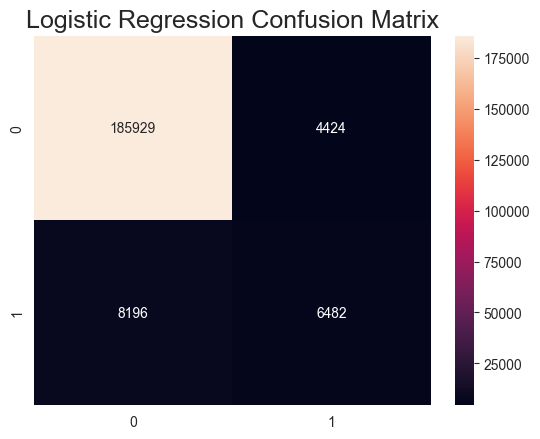

In [28]:
# Confusion Matrix
sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

### Deep Learning Model

In [29]:
# Create a deep learning model with 3 hidden layers
model = Sequential()

# Add an Input layer
model.add(tf.keras.Input(shape=(train_x.shape[1],)))

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

num_classes = len(train_y.unique())
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 13s 609us/step - accuracy: 0.9361 - loss: 0.1347 - val_accuracy: 0.9402 - val_loss: 0.1267
Epoch 2/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 12s 579us/step - accuracy: 0.9388 - loss: 0.1271 - val_accuracy: 0.9412 - val_loss: 0.1258
Epoch 3/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 13s 641us/step - accuracy: 0.9396 - loss: 0.1253 - val_accuracy: 0.9397 - val_loss: 0.1260
Epoch 4/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 14s 661us/step - accuracy: 0.9396 - loss: 0.1264 - val_accuracy: 0.9406 - val_loss: 0.1259
Epoch 5/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 13s 650us/step - accuracy: 0.9401 - loss: 0.1251 - val_accuracy: 0.9412 - val_loss: 0.1247
Epoch 6/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 14s 671us/step - accuracy: 0.9406 - loss: 0.1240 - val_accuracy: 0.9405 - val_loss: 0.1249
Epoch 7/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 14s 698us/step - accuracy: 0.9402 - loss: 0.1246 - val_accuracy: 0.9411 - val_loss: 0.1250
Epoch 8/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 14s 688us/s

In [30]:
# Evaluate the model
predictions = model.predict(test_x)
predictions = predictions.argmax(axis=-1)

print("Accuracy", accuracy_score(test_y, predictions))
print("F1 Score", f1_score(test_y, predictions, average=None))


6408/6408 ━━━━━━━━━━━━━━━━━━━━ 3s 403us/step
Accuracy 0.9411113441382035
F1 Score [0.96855451 0.53732373]


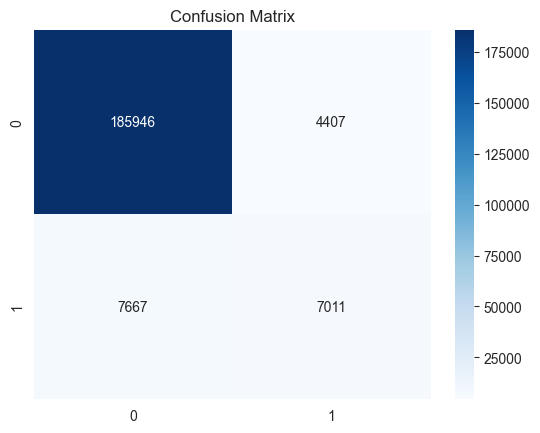

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_y, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Models Analysis
The logistic regression model has an accuracy of 0.9384, and an F1 score of 0.9672 for class 0 and 0.5060 for class 1.

The deep learning model has an accuracy of 0.9420, and an F1 score of 0.9691 for class 0 and 0.5341 for class 1.

Given that the purpose of the model is to predict the death of Covid 19 patients, the more critical metric to evaluate the models is the F1 score for class 1.

Since the deep learning model outperforms logistic regression in all metrics, we will select the deep learning model as the better model to perform tuning.

## Hyperparameter Tuning

In [32]:
# Define a function to build the model
def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(tf.keras.Input(shape=(train_x.shape[1],)))

    # Hidden layers with tuned units
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_3', min_value=8, max_value=32, step=8), activation='relu'))

    # Output layer
    num_classes = len(train_y.unique())
    model.add(Dense(units=num_classes, activation='softmax'))

    # Hyperparameter for learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a tuner using RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,  # Number of trials
    executions_per_trial=1,  # Number of models to train per trial
    directory='tuner_results',  # Directory where results are saved
    project_name='hyperparameter_tuning'  # Name of the project
)

# Run the tuner search
tuner.search(train_x, train_y,
             epochs=20,
             validation_split=0.2,
             batch_size=32,
             verbose=1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build the model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with the optimal hyperparameters
history = best_model.fit(train_x, train_y, epochs=30, batch_size=32, validation_split=0.2)

Trial 10 Complete [00h 04m 27s]
val_accuracy: 0.9410455822944641

Best val_accuracy So Far: 0.9418381452560425
Total elapsed time: 00h 40m 28s
Best Hyperparameters: {'units_1': 64, 'dropout_1': 0.1, 'units_2': 32, 'dropout_2': 0.0, 'units_3': 24, 'learning_rate': 0.001}
Epoch 1/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 14s 648us/step - accuracy: 0.9363 - loss: 0.1336 - val_accuracy: 0.9397 - val_loss: 0.1266
Epoch 2/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 13s 621us/step - accuracy: 0.9388 - loss: 0.1280 - val_accuracy: 0.9400 - val_loss: 0.1269
Epoch 3/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 13s 641us/step - accuracy: 0.9390 - loss: 0.1273 - val_accuracy: 0.9401 - val_loss: 0.1262
Epoch 4/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 13s 617us/step - accuracy: 0.9396 - loss: 0.1267 - val_accuracy: 0.9410 - val_loss: 0.1256
Epoch 5/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 13s 622us/step - accuracy: 0.9390 - loss: 0.1271 - val_accuracy: 0.9408 - val_loss: 0.1255
Epoch 6/30
20503/20503 ━━━━━━━━━━━━━━━━━━━━ 13s 617us/

   4/6408 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9108 - loss: 0.1856     

C:\Code\6006CEM_Assignment\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


6408/6408 ━━━━━━━━━━━━━━━━━━━━ 3s 415us/step - accuracy: 0.9415 - loss: 0.1240
6408/6408 ━━━━━━━━━━━━━━━━━━━━ 3s 417us/step
Test Loss: 0.12314639985561371
Test Accuracy: 0.9411747455596924
F1 Score: [0.96858043 0.53953346]


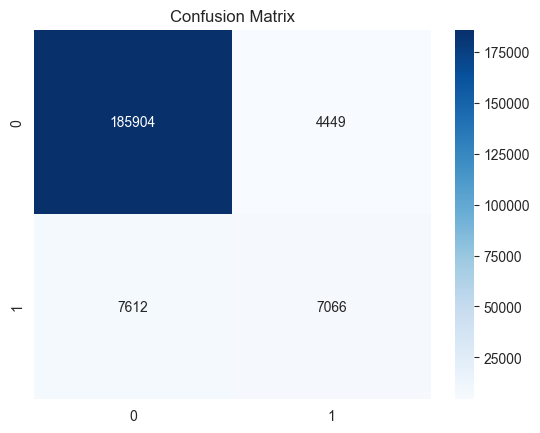

In [33]:
# Load the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(test_x, test_y)

# Make predictions
predictions = best_model.predict(test_x)
predictions = predictions.argmax(axis=-1)

# Calculate the F1 score
f1 = f1_score(test_y, predictions, average=None)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(test_y, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Model Review
The best parameters for the deep learning model has the parameters {'units_1': 128, 'dropout_1': 0.0, 'units_2': 48, 'dropout_2': 0.1, 'units_3': 16, 'learning_rate': 0.001}.

After hyperparameter tuning is performed, the accuracy of the model is 0.9412, and the F1 score is 0.9686 for class 0 and 0.5405 for class 1.

Although there is a very slight (<0.0010) decrease in accuracy and class 0 F1 score, the crucial metric (F1 score for class 1) has increased by 0.0064. The final loss is around 0.1234, which means the model's predictions are relatively close to the actual values.